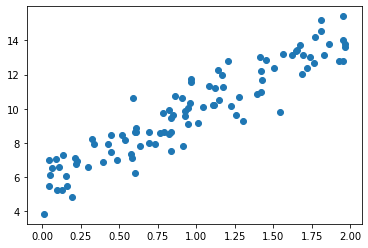

In [2]:
# =============================================== [ setting ] =====================================================
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

np.random.seed(2109)
# y = 4X + 6
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1) 

plt.scatter(X, y)

w1 : 4.375 w0:5.629
Gradient Descent Total Cost:0.9300


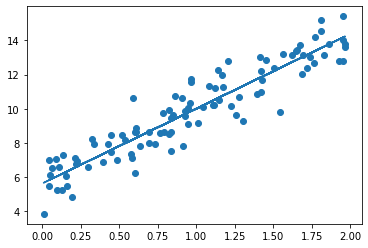

In [12]:
def get_cost(y, y_pred) : 
    N = len(y)
    cost = np.sum(np.square(y - y_pred)) / N
    
    return cost

def get_weight_updates(w1, w0, X, y, learning_rate = 0.01) : 
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    y_pred = np.dot(X, w1.T) + w0 # np.dot = 내적, T = 전치행렬
    diff = y - y_pred
    
    w0_factors = np.ones((N, 1))
    w1_update = -(2/N) * learning_rate * (np.dot(X.T, diff))
    w0_update = -(2/N) * learning_rate * (np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

def gradient_descent_steps(X, y, iters = 10000) : 
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for ind in range(iters) : 
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate = 0.01)
        w1 = w1 - w1_update 
        w0 = w0 - w0_update
        
    return w1, w0

w1, w0 = gradient_descent_steps(X, y, iters = 1000) 
print("w1 : {0:.3f} w0:{1:.3f}".format(w1[0, 0], w0[0, 0]))
y_pred = w1[0, 0] * X + w0
print("Gradient Descent Total Cost:{0:.4f}".format(get_cost(y, y_pred)))

plt.scatter(X, y)
plt.plot(X, y_pred)

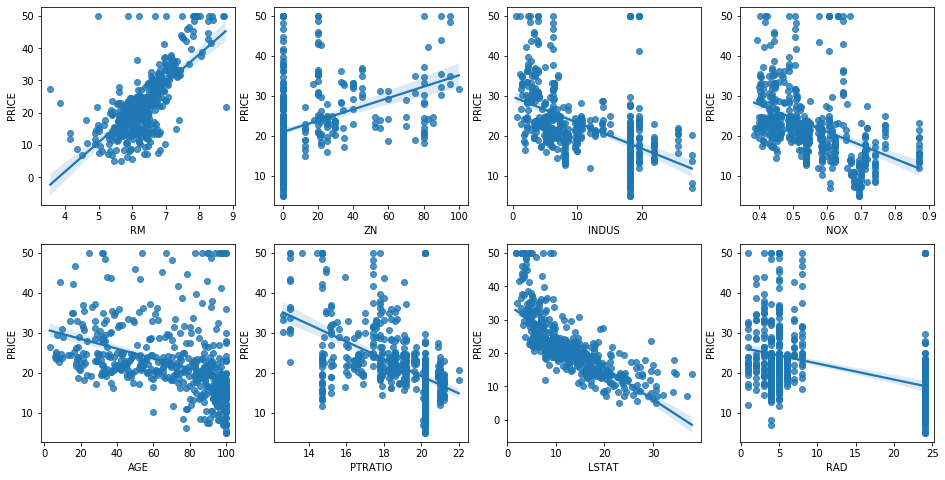

In [22]:
# ============================================== [ boston example ] ==============================================
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats 
from sklearn.datasets import load_boston 

boston = load_boston()
bostonDF = pd.DataFrame(boston.data, columns = boston.feature_names)
bostonDF["PRICE"] = boston.target 

fig, axs = plt.subplots(figsize = (16, 8), ncols = 4, nrows = 2)
lm_features = ["RM", "ZN", "INDUS", "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]
for i, feature in enumerate(lm_features) : 
    row = int(i/4)
    col = i%4
    sns.regplot(x = feature, y = "PRICE", data = bostonDF, ax = axs[row][col])

In [25]:
## + [ modeling ] ======================
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score

y_target = bostonDF["PRICE"]
X_data = bostonDF.drop(["PRICE"], axis = 1, inplace = False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size = 0.3, random_state = 2109)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print("MSE : {0:.3f}, RMSE : {1:.3f}".format(mse, rmse))
print("Variance score : {0:.3f}".format(r2_score(y_test, y_preds)))

MSE : 22.661, RMSE : 4.760
Variance score : 0.712


In [27]:
from sklearn.model_selection import cross_val_score 

neg_mse_scores = cross_val_score(lr, X_data, y_target, scoring = "neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("5-folds의 개별 N-MSE score :", np.round(neg_mse_scores, 2))
print("5-folds의 개별 RMST score :", np.round(rmse_scores, 2))
print("5-folds의 개별 mean-RMSE score :", np.round(avg_rmse, 2))

5-folds의 개별 N-MSE score : [-12.46 -26.05 -33.07 -80.76 -33.31]
5-folds의 개별 RMST score : [3.53 5.1  5.75 8.99 5.77]
5-folds의 개별 mean-RMSE score : 5.83


In [31]:
# =============================================== [ polynomial ] ================================================
from sklearn.preprocessing import PolynomialFeatures
import numpy as np 

X = np.arange(4).reshape(2, 2)
print("일차 단항식 계수 피쳐 : \n", X)

poly = PolynomialFeatures(degree = 2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수 피쳐 : \n", poly_ftr)

일차 단항식 계수 피쳐 : 
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피쳐 : 
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [32]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.pipeline import Pipeline 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import cross_val_score

def true_fun(X) :
    return np.cos(1.5 * np.pi * X)

np.random.seed(2109)
n_samples = 30 
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-1.89] 입니다.
Degree 1 MSE는 0.36571524430244917입니다.

Degree 4 회귀 계수는 [  1.14 -21.5   30.22 -10.85] 입니다.
Degree 4 MSE는 0.013177188107371077입니다.

Degree 15 회귀 계수는 [-2.95000000e+01  1.64853000e+03 -3.79592100e+04  4.75314970e+05
 -3.73824253e+06  1.99590816e+07 -7.58314732e+07  2.10705912e+08
 -4.33447603e+08  6.59558868e+08 -7.32073725e+08  5.75077463e+08
 -3.02282864e+08  9.51868326e+07 -1.35532287e+07] 입니다.
Degree 15 MSE는 2074443.0228993495입니다.


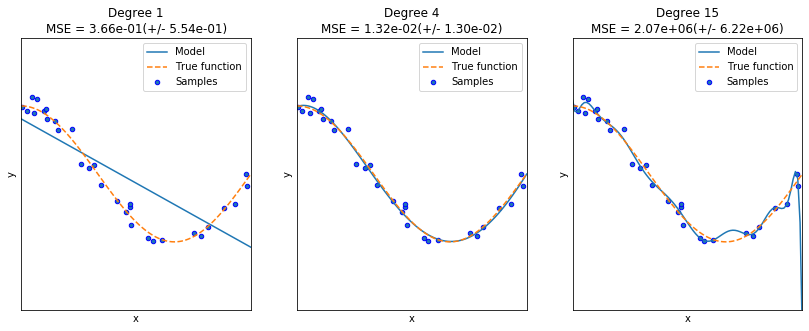

In [34]:
plt.figure(figsize = (14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)) : 
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks = (), yticks = ())
    
    polynomial_features = PolynomialFeatures(degree = degrees[i], include_bias = False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring = "neg_mean_squared_error", cv = 10)
    coefficients = pipeline.named_steps["linear_regression"].coef_
    print("\nDegree {0} 회귀 계수는 {1} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print("Degree {0} MSE는 {1}입니다.".format(degrees[i], -1 * np.mean(scores)))
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label = "Model")
    plt.plot(X_test, true_fun(X_test), "--", label = "True function")
    plt.scatter(X, y, edgecolor = "b", s = 20, label = "Samples")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc = "best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
plt.show()
